# $\S$ 11.3. Neural Networks

### Single layer perceptron

The term _neural networks_ has evolved to encompass a large class of models and learning methods. Here we describe the most widely used "vanilla" neural net, sometimes called the single hidden layer back-propagation network, or single layer perceptron.

There has been a great deal of _hype_ surrounding neural networks, making them seem magical and mysterious. As we make clear in this section, they are just nonlinear statistical models, much like the PPR model.

A neural network is a two-stage regression or classification model, typically represented by a _network diagram_ as in FIGURE 11.2. This network applies both to regression or classification.
* For regression, typically $K=1$ and there is only one output unit $Y_1$ at the top.  
  However, these networks can handle multiple quantitative responses in a seamless fashion, so we will deal with the general case.
* For $K$-class classification, there are $K$ units at the top, with the $k$th unit modeling the probability of class $k$. There are $K$ target measurements $Y_k$ each being coded as a 0-1 variable for the $k$th class.

### $Z$

Derived features $Z_m$ are created from linear combinations of the inputs, and the target $Y_k$ is modeled as a function of linear combinations of the $Z_m$,

\begin{align}
Z_m &= \sigma(\alpha_{0m} + \alpha_m^T X), & m=1,\cdots,M, \\
T_k &= \beta_{0k} + \beta_k^T Z, & k=1,\cdots,K, \\
f_k(X) &= g_k(T), & k=1,\cdots,K.
\end{align}

### Sigmoid

The activation function $\sigma(v)$ is usually chosen to be the _sigmoid_

\begin{equation}
\sigma(v) = \frac{1}{1+e^{-v}}.
\end{equation}

See FIGURE 11.3 for a plot of the sigmoid function.

Sometimes Gaussian radial basis functions (Chapter 6) are used for the $\sigma(v)$, producing what is known as a _radial basis function network_.

In [1]:
"""FIGURE 11.3. Plot of the sigmoid function.
The scale parameter s controls the activation rate,
and we can see that large s amounts to a hard activation at v=0.
Note that sigmoid(s(v-v0)) shifts the activation threshold from 0 to v0."""
import scipy
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x:scipy.ndarray, s:float)->scipy.ndarray:
    return scipy.reciprocal(1+scipy.exp(-s*x))

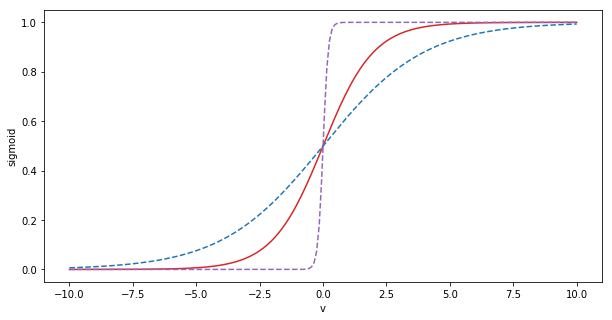

In [4]:
x = scipy.linspace(-10, 10, 200)
y_1 = sigmoid(x, 1)
y_half = sigmoid(x, .5)
y_10 = sigmoid(x, 10)

fig = plt.figure(0, figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y_1, color='C3')
ax.plot(x, y_half, '--', color='C0')
ax.plot(x, y_10, '--', color='C4')
ax.set_xlabel('v')
ax.set_ylabel('sigmoid')
plt.show()

### Bias unit

Neural network diagrams like FIGURE 11.2 are sometimes drawn with an additional _bias_ unit feeding into every unit in the hidden and output layers. Thinking of the constant "$1$" as an additional input feature, this bias unit captures the intercept $\alpha_{0m}$ and $\beta_{0k}$ in the above model.

### $g_k$

The output function $g_k(T)$ allows a final transformation of the vector of outputs $T$. For regression we typically choose the identity function $g_k(T) = T$.

Early work in $K$-class classification also used the identity function, but this was later abandoned in favor of the _softmax_ functon

\begin{equation}
g_k(T) = \frac{\exp T_k}{\sum_{l=1}^K \exp T_l}.
\end{equation}

This is of course exactly the transformation used in the multilogit model ($\S$ 4.4), and produces positive estimates that sum to one. In $\S$ 4.2 we discuss other problems with linear activation functions, in particular potentially severe masking effects.

### $Z$ again

The units in the middle of the network, computing the derived features $Z_m$, are called _hidden units_ because the values $Z_m$ are not directly observed.

We can think of the $Z_m$ as a basis expansion of the original inputs $X$; the neural network is then a standard linear model, or linear multilogit model, using these transformations and inputs.

There is, however, an important enhancement over the basis expansion techniques;

> here the parameters of the basis functions are learned from the data.

### Nonlinear generalization of the linear model

Notice that if $\sigma$ is the identity function, then the entire model collapses to a linear model in the inputs. Hence a neural network can be thought of as a nonlinear generalization of the linear model, both for regression and classification. By introducing the nonlinear transformation $\sigma$, it greatly enlarges the class of linear models.

In FIGURE 11.3 we see that
* the rate of activation of the sigmoid depends on the norm of $\alpha_m$, and
* if $\|\alpha_m\|$ is very small, the unit will indeed be operating in the _linear part_ of its activation function.

### Neural network versus PPR

Notice also that neural network model with one hidden layer has exactly the same form as the projection pursuit model.

The difference is that
* the PPR model uses nonparametric functions $g_m(v)$, while
* the neural network uses a far simpler function based on $\sigma(v)$, with three free parameters in its argument.

In detail, viewing the neural network models as a PPR model, we identify

\begin{align}
g_m(\omega_m^T X) &= \beta_m \sigma(\alpha_{0m} + \alpha_m^T X) \\
&= \beta_m \sigma(\alpha_{0m} + \|\alpha_m\|\omega_m^T X),
\end{align}

where $\omega_m = \alpha_m / \|\alpha_m\|$ is the $m$th unit-vector.

Since

\begin{equation}
\sigma_{\beta,\alpha_0,s}(v) = \beta\sigma(\alpha_0 + sv)
\end{equation}

has lower complexity than a more general nonparametric $g(v)$, it is not surprising that a neural network might use 20 or 100 such functions, while the PPR model typically uses fewer terms, e.g., $M=5$ or $10$.

### The name, and the history

Finally, we note that the name "neural networks" derives from the fact that they were first developed as models for the human brain. Each unit represents a neuron, and the connections (links in FIGURE 11.2) represent synapses.

In early models, the neurons fired when the total signal passed to that unit exceeded a certain threshold. In the model above, this corresponds to use of a step function for $\sigma(Z)$ and $g_m(T)$.

Later the neural network was recognized as a useful tool for nonlinear statistical modeling, and for this purpose the step function is not smooth enough for optimization. Hence the step function was replaced by a smoother threshold function, the sigmoid.